<a href="https://colab.research.google.com/github/AshishGtmMishra/ML-SM-projects-and-tutorials/blob/main/Linear_Models_For_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here I have performed Linear Regression, Polynomial Regression and Logistic Regression using different methods available in Scikit-Learn library, also I have provided line by line explaination so that the tutorial is beginner friendly.

Reference: [Hands-On Machine Learning O'Reilly Book](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m,1)
y = 4 + 3 * X + np.random.randn(m,1)

The above code creates a synthetic dataset for linear regression. It does this by first setting the random seed to 42. This ensures that the same random numbers are generated each time the code is run, which makes the results reproducible.

Next, the code creates a matrix of random numbers called X. Each row of X represents a single data point, and each column represents a feature. In this case, there is only one feature, so X is a 100x1 matrix.

The code then creates a vector of target values called y. Each element of y represents the output for the corresponding data point in X. In this case, the output is a linear function of the input, plus some noise.

`np.random.rand(100,1)` generates an array of shape `(100, 1)` with random values drawn from a **uniform distribution** over the range `[0, 1)`. This means that each number has an equal chance of being drawn from the distribution.

On the other hand, `np.random.randn(100,1)` generates an array of shape `(100, 1)` with random values drawn from a **standard normal distribution** with a mean of 0 and a standard deviation of 1. This means that the numbers are more likely to be drawn from the middle of the distribution than from the tails.

In general, `np.random.rand` is useful for generating random numbers for simulations or other applications where a uniform distribution is appropriate. `np.random.randn` is useful for generating random numbers for statistical analysis or other applications where a normal distribution is appropriate.

Please note that both functions can be used to generate arrays of random numbers with a specified shape ¹².


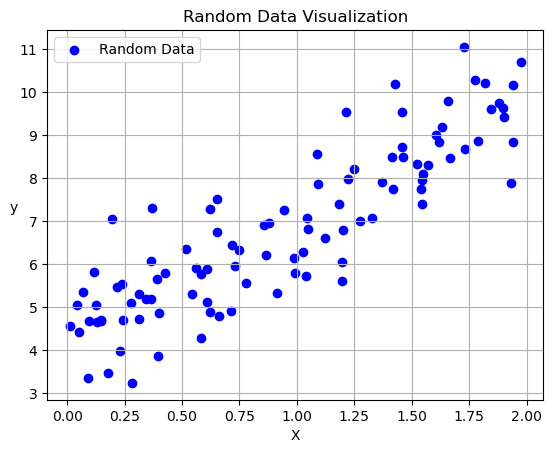

In [ ]:
plt.scatter(X, y, c='b', marker='o', label='Random Data')  # This is used to plot the scatter plot of X and Y
plt.xlabel('X')
plt.ylabel('y',rotation = 0)
plt.title('Random Data Visualization')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

The add_dummy_feature function in the sklearn.preprocessing library creates a new dummy feature for each categorical feature in the dataset. This is useful for linear regression because it allows the model to learn the relationship between the categorical features and the target variable.

and then we try to find the theta best using the normal equation:
θ = (XᵀX)⁻¹Xᵀy

θ is the vector of model parameters
X is the matrix of input features
y is the vector of target values
ᵀ denotes the transpose operator
⁻¹ denotes the inverse operator
The @ operator performs matrix multiplication. If A and B are
NumPy arrays, then A @ B is equivalent to np.matmul(A, B).

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict =  X_new_b @ theta_best
print(y_predict)
print(X_new_b)

[[4.21509616]
 [9.75532293]]
[[1. 0.]
 [1. 2.]]


X_new is a 2x1 matrix containing the new data point.
add_dummy_feature creates dummy features for the new data point and returns a new matrix, X_new_b.
theta_best is the vector of model parameters that were trained on the original dataset.
@ is the matrix multiplication operator.
y_predict is a vector containing the predicted target values for the new data point.

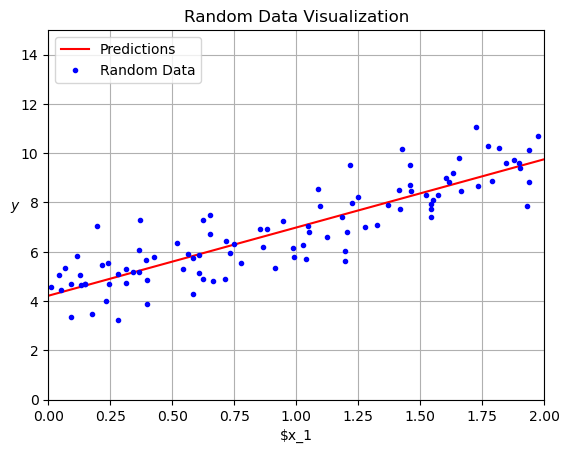

In [ ]:
plt.plot(X_new, y_predict, "r-", label = "Predictions")
plt.plot(X, y, "b.", label = 'Random Data')
plt.xlabel("$x_1")
plt.ylabel("$y$", rotation = 0)
plt.axis([0, 2, 0, 15])
plt.title('Random Data Visualization')
plt.legend(loc = "upper left")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

LinearRegression() creates a new linear regression model object.

fit() trains the model on the training data (X, y).

intercept_ and coef_ are attributes of the linear regression model object that contain the intercept and coefficients of the model, respectively.

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

np.linalg.lstsq() function to solve the linear least squares problem. The least squares problem is the problem of finding the best linear fit to a set of data points.

theta_best_svd is the vector of model parameters that minimizes the mean squared error (MSE) between the predicted and actual values of the target variable.
residuals is a vector containing the residuals for each data point. The residual is the difference between the predicted target value and the actual target value.
rank is the rank of the input matrix, X_b.
s is a singular value decomposition of the input matrix, X_b

The rcond parameter specifies the relative condition number of the input matrix, X_b. The condition number of a matrix is a measure of how sensitive the solution to the linear least squares problem is to perturbations in the input matrix. A higher condition number indicates that the solution is more sensitive to perturbations.

The np.linalg.lstsq() function uses a singular value decomposition (SVD) to solve the linear least squares problem. The SVD is a factorization of the input matrix into a product of three matrices:

X_b = U * S * Vᵀ

U is a unitary matrix, meaning that its columns are orthonormal.
S is a diagonal matrix containing the singular values of the input matrix.
V is a unitary matrix whose columns are the right singular vectors of the input matrix.

The singular values of a matrix are its non-negative eigenvalues in decreasing order. The rank of a matrix is equal to the number of its non-zero singular values.

The np.linalg.lstsq() function uses the SVD to solve the linear least squares problem by finding the least squares solution to the following system of equations:

U * theta_best_svd = y
This system of equations is solved by taking the pseudoinverse of the matrix U. The pseudoinverse of a matrix is a generalization of the inverse matrix that can be used to find the least squares solution to a system of equations, even if the system is underdetermined or overdetermined.

In [ ]:
np.linalg.pinv(X_b) @ y  # Calculating the pseudoinverse direcly

array([[4.21509616],
       [2.77011339]])

In [ ]:
rank

2

In [ ]:
residuals

array([80.6584564])

#### Now we will look at the Gradient Descent

In [ ]:
eta = 0.1 # learning rate
n_epochs = 1000
m = len(X_b) # number of instances
np.random.seed(42)
theta = np.random.randn(2, 1) # randomly initialized model parameters
for epoch in range(n_epochs):
 gradients = 2 / m * X_b.T @ (X_b @ theta - y)
 theta = theta - eta * gradients

The code works as follows:

Initialize the model parameters randomly.
Calculate the gradients of the MSE function with respect to the model parameters.
Update the model parameters in the opposite direction of the gradients.
Repeat steps 2 and 3 until convergence.

The learning rate is a hyperparameter that controls the size of the steps that the model takes in the direction of the gradients. A higher learning rate can lead to faster convergence, but it can also lead to the model overshooting the minimum of the MSE function. A lower learning rate can lead to slower convergence, but it is less likely that the model will overshoot the minimum

The number of epochs is the number of times that the gradient descent algorithm will iterate over the training dataset. A higher number of epochs can lead to better accuracy, but it can also lead to overfitting.

The number of instances is the number of data points in the training dataset.(m = len(X_b))

np.random.seed(42):
Setting the random seed ensures that the model parameters are initialized the same way each time the code is run. This makes the results reproducible

The model parameters are initialized randomly. The np.random.randn(2,1) function generates a random sample from a standard normal distribution. This generates a matrix with the  two rows and singlr column

for epoch in range(n_epochs):
This loop iterates over the training dataset for a specified number of epochs

gradients = 2 / m * X_b.T @ (X_b @ theta - y)
This line calculates the gradients of the MSE function with respect to the model parameters. The @ operator is the matrix multiplication operator.

theta = theta - eta * gradients
This line updates the model parameters in the opposite direction of the gradients.

Once the gradient descent algorithm has converged, the model parameters can be used to make predictions on new data.

In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

When the learning rate is 0.5, theta is:
array([[-7.05138935e+27],
       [-7.98621001e+27]])
       
When the learning rate is 0.1, theta is:
array([[4.21509616],
       [2.77011339]])
       
When the learning rate is 0.02, theta is:
array([[4.21438446],
       [2.77074177]])

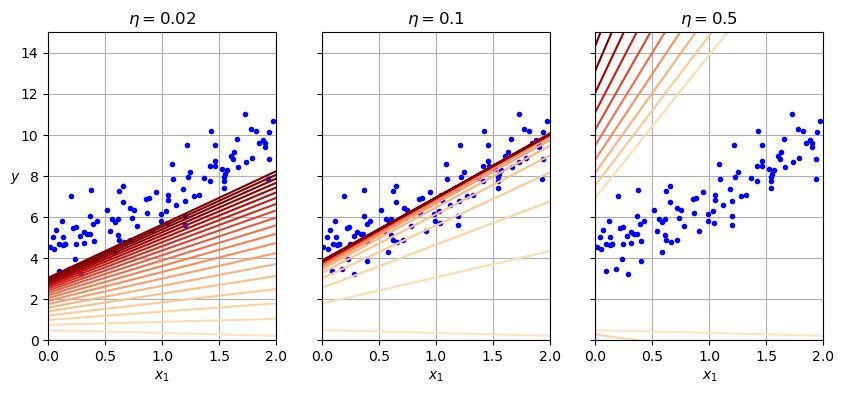

In [ ]:
def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

##### Now we will look at the stochastic Gradient Descent

In [ ]:
theta_path_sgd = []

In [ ]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

np.random.seed(42)
theta = np.random.randn(2,1)

In [ ]:
n_shown = 20
plt.figure(figsize = (6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

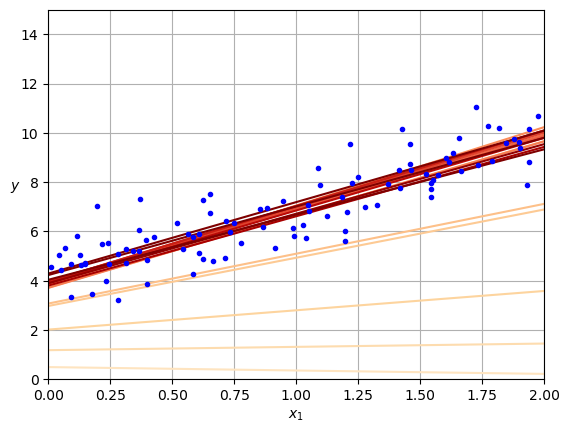

In [ ]:
for epoch in range(n_epochs):
    for iteration in range(m):
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color = color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X,y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation = 0)
plt.axis([0,2,0, 15])
plt.grid()
plt.show()

In [ ]:
theta

array([[4.21076011],
       [2.74856079]])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-5, penalty = None, eta0 = 0.01,
                      n_iter_no_change = 100, random_state = 42)
sgd_reg.fit(X, y.ravel())




SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

The SGDRegressor class is a stochastic gradient descent (SGD) regressor. SGD is a variation of gradient descent in which the model parameters are updated after each data point is processed, instead of after the entire training dataset is processed.

The max_iter parameter specifies the maximum number of iterations to train the model for. The tol parameter specifies the tolerance for convergence. The penalty parameter specifies the regularization penalty to use. The eta0 parameter specifies the initial learning rate. The n_iter_no_change parameter specifies the number of iterations that the model must not improve on before training is stopped. The random_state parameter specifies the random seed to use.

The .ravel() function in the above code is used to flatten the target variable (y) into a one-dimensional array. This is necessary because the SGDRegressor class expects the target variable to be in a one-dimensional array.

The .ravel() function works by iterating over the input array and returning a new array that contains all of the elements of the input array in a single row

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

#### Now we will look at the Mini-Batch Gradient Descent

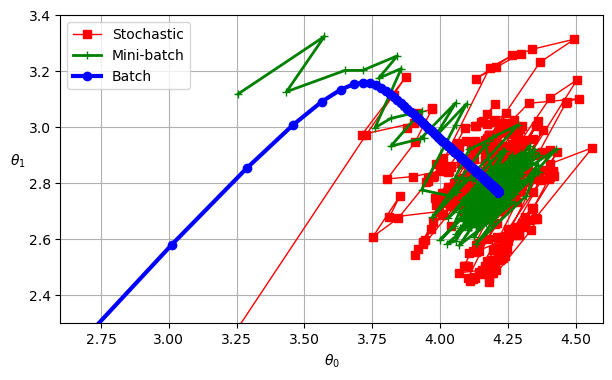

In [ ]:
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")  # Fixed the variable name here
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
plt.show()

 Let's break down the provided code line by line:

1. **Importing Libraries**:
    - `from math import ceil`: This line imports the `ceil` function from the `math` module. The `ceil` function rounds a number up to the nearest integer.

2. **Setting Hyperparameters**:
    - `n_epochs = 50`: The total number of training epochs (iterations) for mini-batch gradient descent.
    - `minibatch_size = 20`: The size of each mini-batch.
    - `n_batches_per_epoch = ceil(m / minibatch_size)`: Calculates the number of mini-batches needed for each epoch. It divides the total number of instances (`m`) by the mini-batch size and rounds up using the `ceil` function.

3. **Initializing Model Parameters**:
    - `np.random.seed(42)`: Sets the random seed for reproducibility.
    - `theta = np.random.randn(2, 1)`: Initializes the model parameters (coefficients) randomly. In this case, we have a 2-dimensional parameter vector (intercept and slope).

4. **Learning Schedule Hyperparameters**:
    - `t0, t1 = 200, 1000`: These are hyperparameters for the learning schedule function.
    - `def learning_schedule(t)`: Defines the learning schedule function, which decreases the learning rate over time. The function returns `t0 / (t + t1)`.

5. **Mini-Batch Gradient Descent (MGD)**:
    - The outer loop runs for `n_epochs` (50 in this case).
    - Inside the epoch loop:
        - `shuffled_indices = np.random.permutation(m)`: Shuffles the indices of the training data to create mini-batches.
        - `X_b_shuffled = X_b[shuffled_indices]` and `y_shuffled = y[shuffled_indices]`: Shuffles the feature matrix `X_b` and target vector `y` according to the shuffled indices.
        - The inner loop iterates through each mini-batch:
            - `idx = iteration * minibatch_size`: Calculates the starting index of the current mini-batch.
            - `xi = X_b_shuffled[idx : idx + minibatch_size]` and `yi = y_shuffled[idx : idx + minibatch_size]`: Extracts the mini-batch data.
            - `gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)`: Computes the gradients using the mini-batch data.
            - `eta = learning_schedule(iteration)`: Calculates the learning rate using the learning schedule.
            - `theta = theta - eta * gradients`: Updates the model parameters using the gradients and learning rate.
            - `theta_path_mgd.append(theta)`: Stores the updated parameters in the `theta_path_mgd` list.

6. **Final Output**:
    - The `theta_path_mgd` list contains the updated model parameters at each iteration of mini-batch gradient descent.

This code snippet implements mini-batch gradient descent with a learning schedule. It's an efficient optimization technique that combines the benefits of both stochastic gradient descent (SGD) and batch gradient descent (BGD). The learning schedule ensures adaptive learning rates during training.

In [ ]:
print("MGD path shape:", np.array(theta_path_mgd).shape)

MGD path shape: (250, 2, 1)


#### Now we will look at Polynomial Regression

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

X = 6 * np.random.rand(m, 1) - 3:
This generates an array X with 100 rows and 1 column. Each element of X is a random number between 0 and 1 (generated by np.random.rand()), multiplied by 6, and then subtracted by 3. So, the values in X will be in the range [-3, 3].

y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1): This generates the target variable y. It is calculated as a quadratic function of X with some added random noise. Specifically:

0.5 * X ** 2: This computes the quadratic term (squared) of X.
X + 2: This adds a linear term to X.
np.random.randn(m, 1): This generates random Gaussian noise with mean 0 and standard deviation 1. The noise is added to the previous terms to create the final y

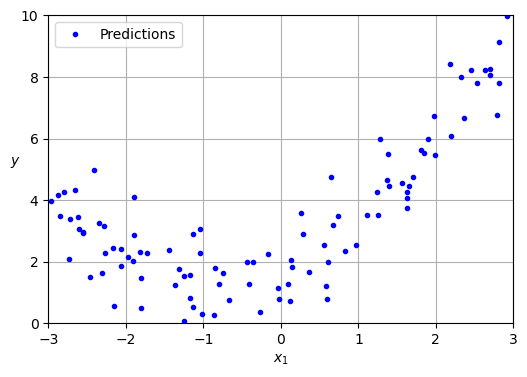

In [ ]:
plt.figure(figsize =(6,4))
plt.plot(X, y, "b.", label = "Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation = 0)
plt.axis([-3, 3, 0, 10])
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

Let's break down the provided code line by line:

1. **Importing the Required Library**:
    - `from sklearn.preprocessing import PolynomialFeatures`: This line imports the `PolynomialFeatures` class from the `sklearn.preprocessing` module. The `PolynomialFeatures` class is used for generating polynomial and interaction features from existing features.

2. **Creating Polynomial Features**:
    - `poly_features = PolynomialFeatures(degree=2, include_bias=False)`: This creates an instance of the `PolynomialFeatures` class with the following parameters:
        - `degree=2`: Specifies the degree of the polynomial features. In this case, it generates quadratic features (up to the second degree).
        - `include_bias=False`: Determines whether to include a bias term (intercept) in the feature matrix. Setting it to `False` means that the bias term will not be included.

3. **Transforming the Feature Matrix**:
    - `X_poly = poly_features.fit_transform(X)`: This applies the polynomial transformation to the original feature matrix `X`. It generates a new feature matrix `X_poly` consisting of all polynomial combinations of the input features (up to the specified degree). For example, if the input sample is one-dimensional (e.g., `[a]`), the degree-2 polynomial features will include `[1, a, a^2]`.

4. **Result**:
    - `X[0]`: This retrieves the first row (instance) from the original feature matrix `X`. It represents the original feature value for that instance.

In summary, the code snippet uses `PolynomialFeatures` to create quadratic features (up to the second degree) from the original feature matrix `X`. These polynomial features can be useful for capturing non-linear relationships in the data when building machine learning models.



In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [ ]:
lin_reg = LinearRegression()   # Here we call the LinearRegression function
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Let's break down the provided code line by line:

1. **Creating a Linear Regression Model**:
    - `lin_reg = LinearRegression()`: This line creates an instance of the `LinearRegression` class from the `sklearn.linear_model` module. The `LinearRegression` class represents a linear regression model.
    - The `lin_reg` object will be used to fit the linear regression model to the data.

2. **Fitting the Model to Data**:
    - `lin_reg.fit(X_poly, y)`: This line fits the linear regression model to the transformed feature matrix `X_poly` and the target vector `y`.
    - The `fit` method computes the coefficients (slope and intercept) of the linear regression line that best fits the given data points.

3. **Model Coefficients**:
    - `lin_reg.intercept_`: This attribute represents the intercept (bias) term of the linear regression model. It is the value of the dependent variable when all independent variables are zero.
    - `lin_reg.coef_`: This attribute represents the coefficients (slopes) of the linear regression model. It provides the weights assigned to each feature (in this case, polynomial features) in the model.

In summary, the code snippet creates a linear regression model, fits it to the transformed polynomial features (`X_poly`), and retrieves the intercept and coefficients of the linear regression line. These coefficients represent the relationship between the features and the target variable in the quadratic regression model.



The output `(array([1.78134581]), array([[0.93366893, 0.56456263]]))`
represents the inntercept and the coefficients of the linear regression model. In the case of polynomial regression with degree 2, the equation will have the form:

y = intercept+coef1 * X + coef2 * X^2

So the equation of the polynomial regression model is:

y = 1.78134581 + 0.93366893 * X + 0.56456263 * X^2

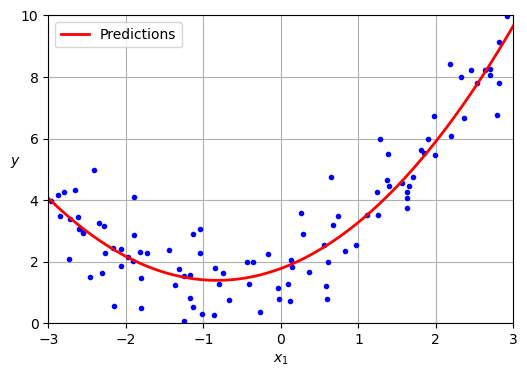

In [ ]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize = (6,4))
plt.plot(X,y, "b.")
plt.plot(X_new, y_new, "r-", linewidth = 2, label = "Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation = 0)
plt.legend(loc = "upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Let's break down the provided code line by line:

1. **Creating New Feature Values (`X_new`)**:
    - `X_new = np.linspace(-3, 3, 100).reshape(100, 1)`: This line generates a new feature matrix `X_new` with 100 data points. It uses `np.linspace` to create evenly spaced values between -3 and 3 (inclusive) and reshapes it into a column vector with shape (100, 1).

2. **Transforming New Features to Polynomial Features (`X_new_poly`)**:
    - `X_new_poly = poly_features.transform(X_new)`: This applies the same polynomial transformation (quadratic features) to the new feature matrix `X_new`. It uses the previously created `poly_features` instance to transform the features.

3. **Predicting Target Values (`y_new`)**:
    - `y_new = lin_reg.predict(X_new_poly)`: This line predicts the target variable `y` (response) for the new feature matrix `X_new_poly` using the trained linear regression model (`lin_reg`). It computes the predicted values based on the learned coefficients (intercept and slopes).

In summary, the code snippet generates new feature values, transforms them into polynomial features, and predicts the corresponding target values using the trained quadratic regression model. The resulting `y_new` contains the predicted values for the given feature range.


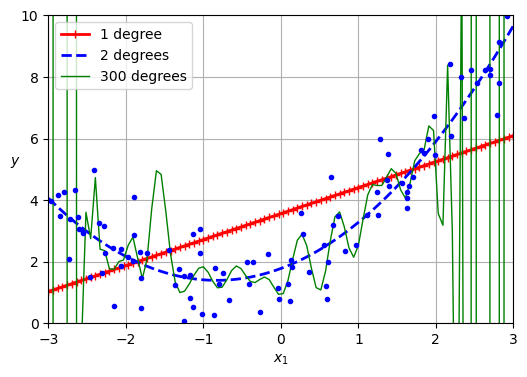

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize = (6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    ploybig_features = PolynomialFeatures(degree = degree, include_bias  = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(ploybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label = label, linewidth = width)

plt.plot(X, y, "b.", linewidth = 3)
plt.legend(loc = "upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation = 0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

300-degree polynomial model to the preceding training data, and compares the result with a pure linear model and a quadratic model (second-degree polynomial). Notice how the 300-degree polynomial model wiggles around to get as close as possible to the training instances.
This high-degree polynomial regression model is severely overfitting the training data, while the linear model is underfitting it.

Let's break down the provided code line by line:

1. **Creating a Polynomial Regression Model with Scaling**:
    - The code snippet aims to create and visualize polynomial regression models of different degrees (1, 2, and 300) using the given data (`X` and `y`).

2. **Loop Over Different Degrees**:
    - `for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):`: This loop iterates over three tuples, each containing:
        - `style`: A string representing the line style for plotting (e.g., "r-+" for red solid line with markers).
        - `width`: An integer representing the line width for plotting.
        - `degree`: An integer representing the degree of the polynomial features to be used.

3. **Creating a Pipeline**:
    - `ploybig_features = PolynomialFeatures(degree=degree, include_bias=False)`: This creates an instance of `PolynomialFeatures` with the specified degree. It generates polynomial features (up to the specified degree) from the original features.
    - `std_scaler = StandardScaler()`: This creates an instance of `StandardScaler`, which standardizes the features by removing the mean and scaling to unit variance.
    - `lin_reg = LinearRegression()`: This creates an instance of `LinearRegression`, which represents the linear regression model.
    - `polynomial_regression = make_pipeline(ploybig_features, std_scaler, lin_reg)`: This creates a pipeline that sequentially applies the polynomial features transformation, standard scaling, and linear regression.

4. **Fitting the Model and Predicting New Values**:
    - `polynomial_regression.fit(X, y)`: This fits the polynomial regression model to the original feature matrix `X` and the target vector `y`.
    - `y_newbig = polynomial_regression.predict(X_new)`: This predicts the target variable `y` for the new feature matrix `X_new` using the trained polynomial regression model.

5. **Plotting the Results**:
    - The code then plots the predicted values (`y_newbig`) for each degree of the polynomial regression model.


In [ ]:
X.shape

(100, 1)

In [ ]:
y.shape

(100, 1)

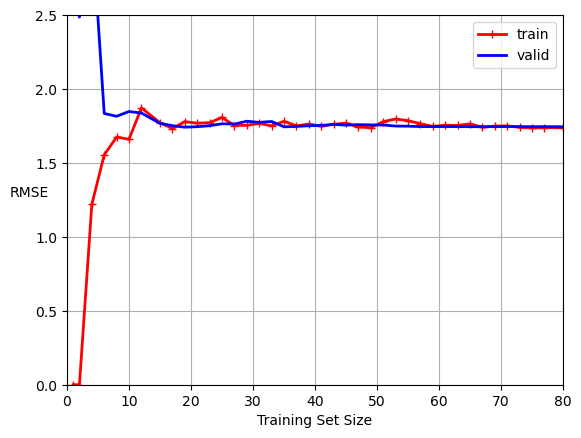

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X, y,  train_sizes = np.linspace(0.01, 1.0, 40), cv = 5, scoring = "neg_root_mean_squared_error" )

train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)

plt.plot(train_sizes, train_errors, "r-+", linewidth = 2, label = "train")
plt.plot(train_sizes, valid_errors, "b-", linewidth = 2, label = "valid")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE", rotation = 0)
plt.axis([0, 80, 0, 2.5])
plt.grid()
plt.legend()
plt.show()

Let's break down the provided code line by line:

1. **Importing the Required Library**:
    - `from sklearn.model_selection import learning_curve`: This line imports the `learning_curve` function from the `sklearn.model_selection` module. The `learning_curve` function is used to generate learning curves for evaluating model performance.

2. **Computing Learning Curves**:
    - `train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error")`: This line computes the learning curves for a linear regression model.
        - `LinearRegression()`: The linear regression model to be evaluated.
        - `X`: The feature matrix (input data).
        - `y`: The target vector (output data).
        - `train_sizes`: An array of relative or absolute numbers of training examples that will be used to generate the learning curve.
        - `cv`: The cross-validation strategy (number of folds or a splitter).
        - `scoring`: The scoring metric to evaluate the model (negative root mean squared error in this case).

3. **Calculating Errors**:
    - `train_errors = -train_scores.mean(axis=1)`: Computes the mean training error (negative root mean squared error) across different training set sizes.
    - `valid_errors = -valid_scores.mean(axis=1)`: Computes the mean validation error (negative root mean squared error) across different training set sizes.

4. **Plotting the Learning Curves**:
    - The code then plots the training and validation errors against the training set size using `matplotlib`.
    - The x-axis represents the training set size, and the y-axis represents the root mean squared error (RMSE).
    - The red line represents the training error, and the blue line represents the validation error.
    - The plot is customized with axis labels, limits, grid, and a legend.

In summary, the code snippet generates learning curves to visualize how the model's performance (RMSE) changes with varying training set sizes. It helps diagnose issues related to bias and variance in the model.


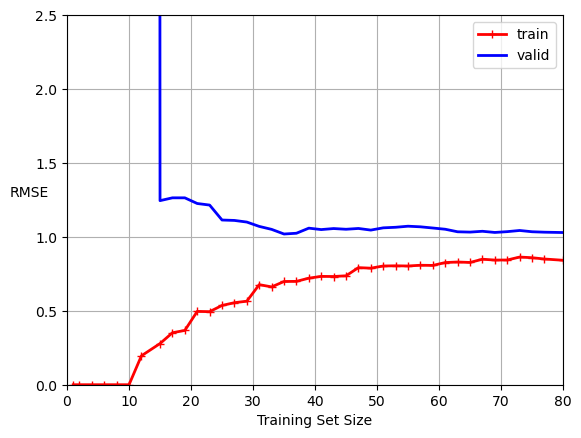

In [ ]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree = 10, include_bias = False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression, X, y,  train_sizes = np.linspace(0.01, 1.0, 40), cv = 5, scoring = "neg_root_mean_squared_error" )

train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)

plt.plot(train_sizes, train_errors, "r-+", linewidth = 2, label = "train")
plt.plot(train_sizes, valid_errors, "b-", linewidth = 2, label = "valid")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE", rotation = 0)
plt.axis([0, 80, 0, 2.5])
plt.grid()
plt.legend()
plt.show()

Let's break down the provided code line by line:

1. **Creating a Polynomial Regression Model with Scaling**:
    - `polynomial_regression = make_pipeline(PolynomialFeatures(degree=10, include_bias=False), LinearRegression())`: This line creates a pipeline for polynomial regression with the following steps:
        - `PolynomialFeatures(degree=10, include_bias=False)`: This generates polynomial features (up to the 10th degree) from the original features. The `include_bias=False` ensures that no bias term (intercept) is included.
        - `LinearRegression()`: This represents the linear regression model.

2. **Computing Learning Curves**:
    - `train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error")`: This line computes the learning curves for the polynomial regression model.
        - `X`: The feature matrix (input data).
        - `y`: The target vector (output data).
        - `train_sizes`: An array of relative or absolute numbers of training examples that will be used to generate the learning curve.
        - `cv`: The cross-validation strategy (number of folds or a splitter).
        - `scoring`: The scoring metric to evaluate the model (negative root mean squared error in this case).

In summary, the code snippet creates a polynomial regression model of degree 10, applies scaling using a pipeline, and computes learning curves to evaluate the model's performance with varying training set sizes. The negative root mean squared error (RMSE) is used as the evaluation metric.


In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

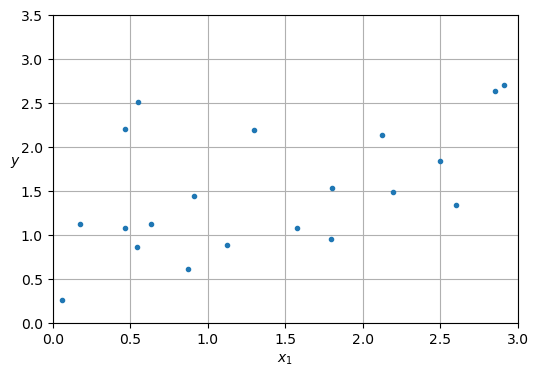

In [ ]:
plt.figure(figsize = (6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation = 0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

 implementation of Ridge Regression, which is a regularized version of linear regression. Here's a line-by-line explanation of the code:

```python
from sklearn.linear_model import Ridge
```
This line imports the Ridge class from the `linear_model` module of the `sklearn` library.

```python
ridge_reg = Ridge(alpha = 0.1, solver = "cholesky")
```
This line creates an instance of the Ridge class with an alpha value of 0.1 and a solver of "cholesky". The alpha value is the regularization strength, which helps to prevent overfitting by adding a penalty term to the cost function. The solver is the algorithm used to compute the weights of the model.

```python
ridge_reg.fit(X, y)
```
This line fits the Ridge regression model to the training data `X` and target variable `y`. The `fit()` method computes the weights of the model that minimize the cost function.

```python
ridge_reg.predict([[1.5]])
```
This line predicts the target variable for a new input value of 1.5 using the trained Ridge regression model. The `predict()` method takes a 2D array as input, where each row represents a new input value and each column represents a feature. Since this is a simple linear regression model, there is only one feature.

Please note that the `X` and `y` variables are not defined in the code you provided. These variables should be replaced with the training data and target variable for your specific problem ¹².


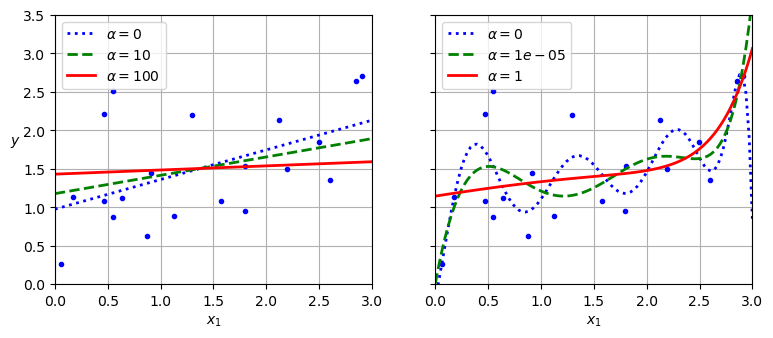

In [ ]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

implementation of Ridge Regression, which is a regularized version of linear regression. Here's a line-by-line explanation of the code:

```python
def plot_model(model_class, polynomial, alphas, **model_kwargs):
```
This line defines a function `plot_model` that takes in a model class, a boolean value indicating whether to use polynomial features, a tuple of alpha values, and any additional keyword arguments for the model.

```python
plt.plot(X, y, "b.", linewidth=3)
```
This line plots the training data `X` and target variable `y` as blue dots with a linewidth of 3.

```python
for alpha, style in zip(alphas, ("b:", "g--", "r-")):
```
This line iterates over the alpha values and corresponding line styles.

```python
if alpha > 0:
    model = model_class(alpha, **model_kwargs)
else:
    model = LinearRegression()
```
This line creates an instance of the Ridge class with the given alpha value and any additional keyword arguments. If the alpha value is 0, it creates an instance of the LinearRegression class instead.

```python
if polynomial:
    model = make_pipeline(
        PolynomialFeatures(degree=10, include_bias=False),
        StandardScaler(),
        model)
```
This line creates a pipeline that includes polynomial features, standard scaling, and the model. The degree of the polynomial features is set to 10.

```python
model.fit(X, y)
```
This line fits the model to the training data `X` and target variable `y`.

```python
y_new_regul = model.predict(X_new)
```
This line predicts the target variable for a new input value `X_new` using the trained model.

```python
plt.plot(X_new, y_new_regul, style, linewidth=2,
         label=fr"$\alpha = {alpha}$")
```
This line plots the predicted values as a line with the given style and label.

```python
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.axis([0, 3, 0, 3.5])
plt.grid()
```
These lines add a legend, x-axis label, axis limits, and grid to the plot.

```python
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()
```
These lines create a figure with two subplots, call the `plot_model` function twice with different arguments, and display the resulting plot.

Please note that the `X`, `y`, and `X_new` variables are not defined in the code you provided. These variables should be replaced with the training data, target variable, and new input values for your specific problem ¹².


In [ ]:
sgd_reg = SGDRegressor(penalty = "l2", alpha = 0.1 / m, tol = None,
                      max_iter = 1000, eta0 = 0.01, random_state = 42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.55302613])

implementation of Stochastic Gradient Descent (SGD) Regression, which is a linear regression algorithm that uses stochastic gradient descent to minimize the cost function. Here's a line-by-line explanation of the code:

```python
sgd_reg = SGDRegressor(penalty = "l2", alpha = 0.1 / m, tol = None,
                      max_iter = 1000, eta0 = 0.01, random_state=42)
```
This line creates an instance of the SGDRegressor class with an L2 penalty, an alpha value of 0.1 divided by the number of examples in the dataset, a maximum of 1000 iterations, an initial learning rate of 0.01, and a random state of 42.

```python
sgd_reg.fit(X, y.ravel())
```
This line fits the SGD regression model to the training data `X` and target variable `y`. The `fit()` method computes the weights of the model that minimize the cost function.

```python
sgd_reg.predict([[1.5]])
```
This line predicts the target variable for a new input value of 1.5 using the trained SGD regression model. The `predict()` method takes a 2D array as input, where each row represents a new input value and each column represents a feature. Since this is a simple linear regression model, there is only one feature.

Please note that the `X` and `y` variables are not defined in the code you provided. These variables should be replaced with the training data and target variable for your specific problem. Also, the value of `m` is not defined in the code you provided. This variable should be replaced with the number of examples in the dataset.

The penalty hyperparameter sets the type of regularization term to use. Specifying "l2" indicates that you want SGD to add a regularization term to the MSE cost function equal to alpha times the square of the ℓ2 norm of the weight vector. This is
just like ridge regression, except there’s no division by m in this case; that’s why we passed alpha=0.1 / m, to get the same result as Ridge(alpha=0.1).

In [ ]:
ridge_reg = Ridge(alpha=0.1, solver = "sag", random_state = 42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55326019]])

Here is a line-by-line explanation of the code:

```python
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
```
This line creates a Ridge regression object called `ridge_reg`. The `alpha` parameter is set to 0.1, which is the regularization strength. The `solver` parameter is set to "sag", which stands for Stochastic Average Gradient descent. The `random_state` parameter is set to 42, which is the seed used by the random number generator.

```python
ridge_reg.fit(X, y)
```
This line fits the Ridge regression model to the data. `X` is the input data, and `y` is the target variable.

```python
ridge_reg.predict([[1.5]])
```
This line predicts the target variable for a new input value of 1.5 using the trained Ridge regression model.

Please note that Ridge regression is a linear regression model with L2 regularization. The regularization term helps to prevent overfitting by adding a penalty to the sum of the squared weights. The `alpha` parameter controls the strength of the regularization. The `solver` parameter specifies the algorithm used to solve the optimization problem. The `random_state` parameter is used to ensure reproducibility of the results.


In [ ]:
# Solving using the equation
alpha = 0.1
A = np.array([[0., 0.], [0., 1.]])
X_b = np.c_[np.ones(m), X]
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

array([[0.97898394],
       [0.3828496 ]])

Here is a line-by-line explanation of the code:

```python
alpha = 0.1
A = np.array([[0., 0.], [0., 1.]])
```
The first line sets the regularization strength parameter `alpha` to 0.1. The second line creates a 2x2 matrix `A` with zeros in the first row and column, and a 1 in the bottom right corner. This matrix is used to apply regularization to the regression coefficients.

```python
X_b = np.c_[np.ones(m), X]
```
This line adds a column of ones to the input data `X`. This is done to include the bias term in the regression.

```python
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y
```
This line computes the Ridge regression coefficients using the closed-form solution. The `@` operator is used for matrix multiplication. The `inv()` function computes the inverse of the matrix `X_b.T @ X_b + alpha * A`. The `T` attribute is used to transpose the matrix `X_b`. The `@` operator is used again to multiply the inverse matrix with `X_b.T`. Finally, the `@` operator is used to multiply the result with the target variable `y`.

Please note that Ridge regression is a linear regression model with L2 regularization. The regularization term helps to prevent overfitting by adding a penalty to the sum of the squared weights. The `alpha` parameter controls the strength of the regularization. The matrix `A` is used to apply the regularization to the regression coefficients. The `X` and `y` variables are the input data and target variable, respectively. The output of this code is the predicted target variable for the input value of 1.5.


In [ ]:
ridge_reg.intercept_, ridge_reg.coef_

(array([0.97896386]), array([[0.38286422]]))

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])


```python
from sklearn.linear_model import Lasso
```
This line imports the `Lasso` class from the `linear_model` module of the `sklearn` library. `Lasso` is a linear regression model with L1 regularization.

```python
lasso_reg = Lasso(alpha=0.1)
```
This line creates a `Lasso` object called `lasso_reg`. The `alpha` parameter is set to 0.1, which is the regularization strength.

```python
lasso_reg.fit(X, y)
```
This line fits the `Lasso` regression model to the data. `X` is the input data, and `y` is the target variable.

```python
lasso_reg.predict([[1.5]])
```
This line predicts the target variable for a new input value of 1.5 using the trained `Lasso` regression model.

Please note that `Lasso` regression is a linear regression model with L1 regularization. The regularization term helps to prevent overfitting by adding a penalty to the sum of the absolute weights. The `alpha` parameter controls the strength of the regularization. The output of this code is the predicted target variable for the input value of 1.5.


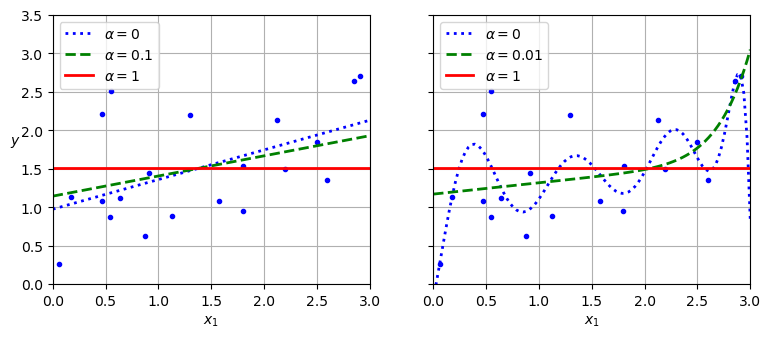

In [ ]:
plt.figure(figsize = (9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial = False, alphas = (0, 0.1, 1), random_state = 42)
plt.ylabel("$y$", rotation = 0)
plt.subplot(122)
plot_model(Lasso, polynomial = True, alphas = (0, 1e-2, 1), random_state = 42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

Here we used the same plot_model function that was used in the plotting of the Ridge Regression and Here instead of Ridge we have given Lasso model

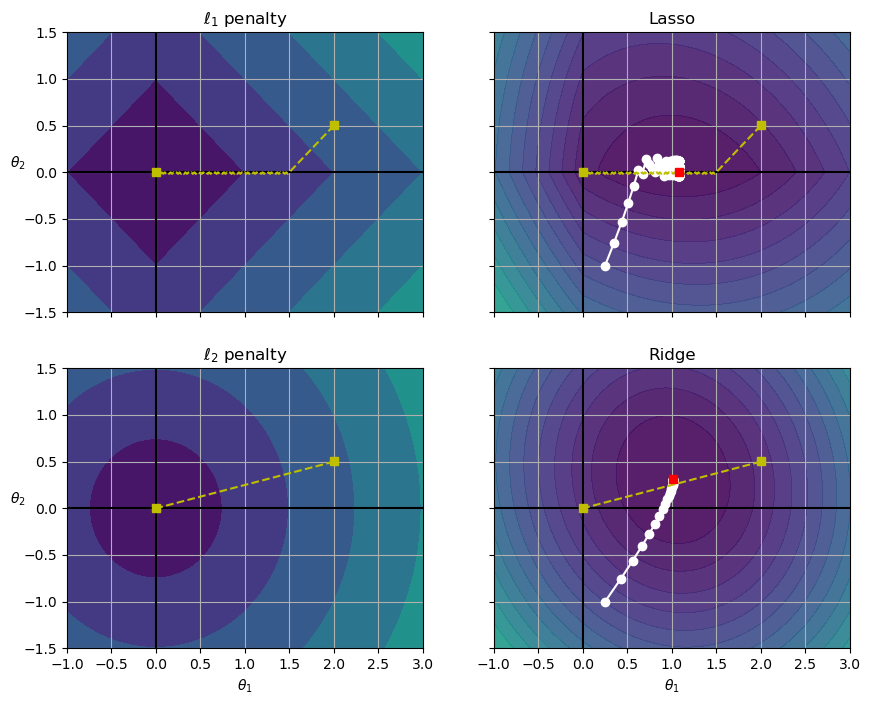

In [ ]:
# extra code –

t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")


plt.show()

### Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])


```python
from sklearn.linear_model import ElasticNet
```
This line imports the `ElasticNet` class from the `linear_model` module of the `sklearn` library.

```python
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
```
This line creates an instance of the `ElasticNet` class with the specified hyperparameters `alpha` and `l1_ratio`. `alpha` is the regularization strength, while `l1_ratio` is the mixing parameter between L1 and L2 regularization.

```python
elastic_net.fit(X, y)
```
This line fits the `ElasticNet` model to the training data `X` and target variable `y`.

```python
elastic_net.predict([[1.5]])
```
This line predicts the target variable for a new input value of `1.5` using the trained `ElasticNet` model.

Please note that the code you provided is incomplete, as `X` and `y` are not defined. You will need to define these variables before running the code.


### Early Stopping

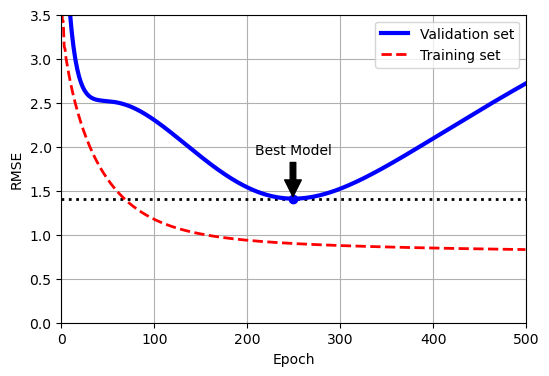

In [ ]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]


# preprocessing = make_pipeline(PolynomialFeatures(degree= 90, include_bias= False),
#                              StandardScaler())
# X_train_prep = preprocessing.fit_transform(X_train)
# X_valid_prep = preprocessing.transform(X_valid)
# sdg_reg = SGDRegressor(penalty = None, eta0 = 0.002, random_state=42)
# n_epochs = 500
# best_valid_rmse = float('inf')
# train_errors, val_errors = [], []
preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []

# for epoch in range(n_epochs):
#     sgd_reg.partial_fit(X_train_prep, y_train)
#     y_valid_predict = sgd_reg.predict(X_valid_prep)
#     val_error = mean_squared_error(y_valid, y_valid_predict, squared = False)
#     if val_error < best_valid_rmse:
#         best_valid_rmse = val_error
#         best_model = deepcopy(sgd_reg)
for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared= False)
    val_errors.append(val_error)
    train_errors.append(train_error)

best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6,4))
plt.annotate('Best Model',
            xy =  (best_epoch, best_valid_rmse),
            xytext = (best_epoch, best_valid_rmse+ 0.5) ,
            ha = 'center',
            arrowprops = dict(facecolor = 'black', shrink = 0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()


```python
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]


preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []
```
These lines import necessary libraries and initialize variables. Specifically:
- `from copy import deepcopy` imports the `deepcopy` function from the `copy` module.
- `from sklearn.metrics import mean_squared_error` imports the `mean_squared_error` function from the `metrics` module of the `sklearn` library.
- `from sklearn.preprocessing import StandardScaler` imports the `StandardScaler` class from the `preprocessing` module of the `sklearn` library.
- `np.random.seed(42)` sets the seed for the random number generator to ensure reproducibility of results.
- `m = 100` sets the number of samples to 100.
- `X = 6 * np.random.rand(m, 1) - 3` generates a random array of shape `(m, 1)` with values between -3 and 3.
- `y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)` generates a random array of shape `(m, 1)` using the formula `y = 0.5 * X^2 + X + 2 + noise`, where `noise` is a random array of shape `(m, 1)` with normally distributed values.
- `X_train, y_train = X[: m // 2], y[: m // 2, 0]` splits the data into training and validation sets.
- `X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]` splits the data into training and validation sets.
- `preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False), StandardScaler())` creates a pipeline that applies polynomial features and standard scaling to the data.
- `X_train_prep = preprocessing.fit_transform(X_train)` applies the preprocessing pipeline to the training data.
- `X_valid_prep = preprocessing.transform(X_valid)` applies the preprocessing pipeline to the validation data.
- `sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)` creates an instance of the `SGDRegressor` class with the specified hyperparameters `penalty`, `eta0`, and `random_state`.
- `n_epochs = 500` sets the number of epochs to 500.
- `best_valid_rmse = float('inf')` initializes the best validation root mean squared error to infinity.
- `train_errors, val_errors = [], []` initializes empty lists to store the training and validation errors.

```python
for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)
        
     y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared= False)
    val_errors.append(val_error)
    train_errors.append(train_error)
```
These lines train the `SGDRegressor` model using the training data and compute the validation and training errors at each epoch. Specifically:
- `for epoch in range(n_epochs):` iterates over the number of epochs.
- `sgd_reg.partial_fit(X_train_prep, y_train)` performs a single epoch of training on the training data.
- `y_valid_predict = sgd_reg.predict(X_valid_prep)` computes the predicted target values for the validation data.
- `val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)` computes the root mean squared error between the predicted and actual target values for the validation data.
- `if val_error < best_valid_rmse:` checks if the current validation error is less than the best validation error so far



```python
best_epoch = np.argmin(val_errors)
```
This line finds the epoch with the lowest validation error.

```python
plt.figure(figsize=(6,4))
```
This line creates a new figure with the specified size.

```python
plt.annotate('Best Model',
            xy =  (best_epoch, best_valid_rmse),
            xytext = (best_epoch, best_valid_rmse+ 0.5) ,
            ha = 'center',
            arrowprops = dict(facecolor = 'black', shrink = 0.05))
```
This line adds an annotation to the plot indicating the epoch with the lowest validation error.

```python
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
```
This line plots a horizontal line at the height of the best validation error.

```python
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
```
This line plots the validation error as a function of the number of epochs.

```python
plt.plot(best_epoch, best_valid_rmse, "bo")
```
This line plots a blue dot at the epoch with the lowest validation error.

```python
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
```
This line plots the training error as a function of the number of epochs.

```python
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()
```
These lines add a legend to the plot, set the x and y axis labels, set the axis limits, add a grid, and display the plot.


This code adds polynomial features and scales all input features for both the training and validation sets. It then creates an `SGDRegressor` model with no regularization and a small learning rate. In the training loop, it calls `partial_fit()` instead of `fit()` to perform incremental learning. At each epoch, it measures the root mean squared error (RMSE) on the validation set. If the RMSE is lower than the lowest RMSE seen so far, it saves a copy of the model in the `best_model` variable. This implementation does not actually stop training, but it lets you revert to the best model after training. Note that the model is copied using `copy.deepcopy()`, which copies both the model’s hyperparameters and the learned parameters. In contrast, `sklearn.base.clone()` only copies the model’s hyperparameters.


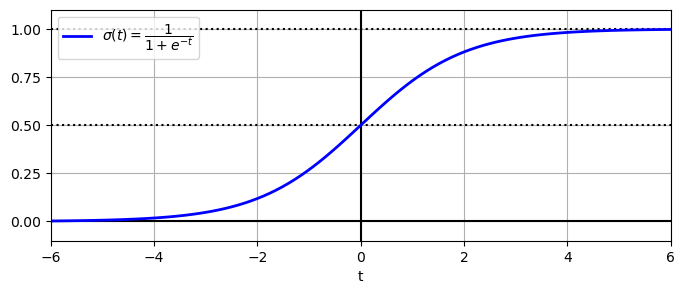

In [ ]:
lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()

![](https://www.bing.com/th?id=OSK.1d70813be5b1e5786e63f3b0325d0f87&pid=cdx&w=320&h=213&c=7)

The code you provided is written in Python and uses the **matplotlib** library to plot a sigmoid function. Here is a line-by-line explanation of the code:

```python
lim = 6
```
This line initializes a variable `lim` to 6.

```python
t = np.linspace(-lim, lim, 100)
```
This line creates an array `t` of 100 evenly spaced values between `-lim` and `lim`. The `linspace` function from the **numpy** library is used to generate these values.

```python
sig = 1 / (1 + np.exp(-t))
```
This line computes the sigmoid function for each value in `t`. The sigmoid function is defined as $$\sigma(t) = \frac{1}{1 + e^{-t}}$$

```python
plt.figure(figsize=(8, 3))
```
This line creates a new figure with a width of 8 inches and a height of 3 inches.

```python
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
```
These lines plot horizontal and vertical lines to create a grid.

```python
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
```
This line plots the sigmoid function using the `plot` function. The `b-` argument specifies that the line should be blue and solid. The `linewidth` argument sets the width of the line to 2. The `label` argument specifies the label for the line, which is rendered using LaTeX.

```python
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()
```
These lines add a label to the x-axis, set the y-axis ticks, add a legend, set the axis limits, add a grid, and display the plot.



In [ ]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame = True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris.data.head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
iris.target.head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
Name: target, dtype: int32

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

The code provided is an example of how to use the `LogisticRegression` classifier from the `sklearn.linear_model` module to fit a binary classification model to the Iris dataset. The Iris dataset is a classic and very easy multi-class classification dataset that is often used as a benchmark for machine learning algorithms.

In this example, the code loads the Iris dataset using the `iris.data` attribute from the `sklearn.datasets` module. It then selects the `"petal width (cm)"` feature from the dataset and assigns it to the variable `X`. The target variable `y` is set to `True` for samples that belong to the `"virginica"` class and `False` otherwise. The `train_test_split` function from the `sklearn.model_selection` module is used to split the data into training and testing sets. The `random_state` parameter is set to `42` to ensure that the results are reproducible. The training data is then used to fit a logistic regression model using the `LogisticRegression` class from the `sklearn.linear_model` module.

Please note that this is just an example of how to use the `LogisticRegression` classifier with the Iris dataset. The code can be modified to work with other datasets or to use different features and target variables.


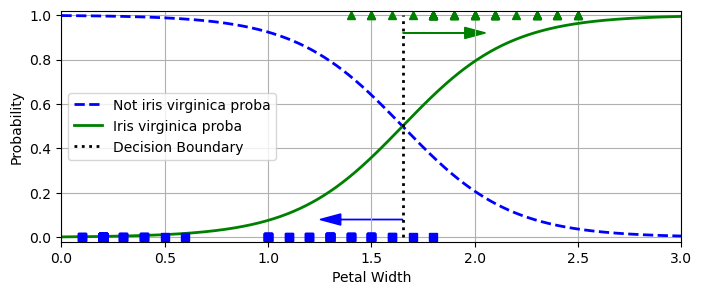

In [ ]:
X_new =np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize = (8, 3))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth = 2,
        label = "Not iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth = 2, label = "Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0,1], "k:", linewidth = 2,
        label = "Decision Boundary")

plt.arrow(x = decision_boundary, y = 0.08, dx = -0.3, dy = 0,
         head_width = 0.05, head_length = 0.1, fc = "b", ec = "b")
plt.arrow(x = decision_boundary, y = 0.92, dx= 0.3, dy = 0,
         head_width = 0.05, head_length = 0.1, fc = "g", ec = "g")
plt.plot(X_train[y_train== 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal Width")
plt.ylabel("Probability")
plt.legend(loc = "center left")
plt.grid(True)
plt.axis([0, 3, -0.02, 1.02])
plt.show()



```python
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
```
- `np.linspace(0, 3, 1000)`: Creates an array of 1000 evenly spaced values between 0 and 3.
- `.reshape(-1, 1)`: Reshapes the array to have a single feature (column) for compatibility with the model.

```python
y_proba = log_reg.predict_proba(X_new)
```
- `log_reg.predict_proba(X_new)`: Predicts class probabilities for the input data `X_new` using the trained logistic regression model.

```python
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]
```
- `y_proba[:, 1] >= 0.5`: Selects the instances where the predicted probability of the positive class (Iris virginica) is greater than or equal to 0.5.
- `X_new[y_proba[:, 1] >= 0.5][0, 0]`: Retrieves the first instance (smallest petal width) where the probability is above the threshold, determining the decision boundary.

```python
plt.figure(figsize=(8, 3))
```
- Creates a new figure for the plot with a specified size of 8x3 inches.

```python
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
```
- Plots the predicted probabilities for not being Iris virginica (blue dashed line) and for being Iris virginica (green solid line).

```python
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision Boundary")
```
- Plots a vertical dotted line at the decision boundary determined earlier.

```python
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0, head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0, head_width=0.05, head_length=0.1, fc="g", ec="g")
```
- Adds arrows indicating the direction of the decision function for both classes.

```python
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
```
- Plots training data points, blue squares for class 0 and green triangles for class 1.

```python
plt.xlabel("Petal Width")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.grid(True)
plt.axis([0, 3, -0.02, 1.02])
plt.show()
```
- Sets axis labels, adds a legend, enables the grid, and sets axis limits. Finally, displays the plot.

In [ ]:
decision_boundary

1.6516516516516517

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

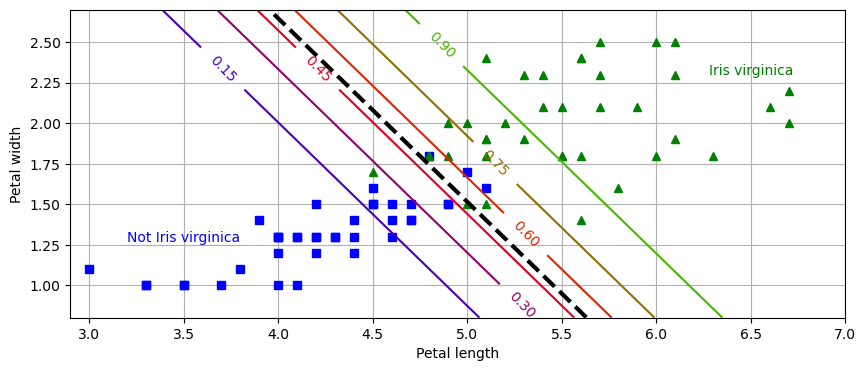

In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state = 42)
log_reg.fit(X_train, y_train)

x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                    np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
            / log_reg.coef_[0, 1])

plt.figure(figsize = (10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap = plt.cm.brg)
plt.clabel(contour, inline = 1)
plt.plot(left_right, boundary, "k--", linewidth = 3)
plt.text(3.5, 1.27, "Not Iris virginica", color = "b", ha = "center")
plt.text(6.5, 2.3, "Iris virginica", color = "g", ha = "center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()

trains a logistic regression model on the Iris dataset and plots the decision boundary. Here is a line-by-line explanation of the code:

```python
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
```
This line extracts the petal length and petal width features from the Iris dataset and stores them in a NumPy array called `X`.

```python
y = iris.target_names[iris.target] == 'virginica'
```
This line creates a binary target variable `y` that is `True` if the target is `Iris virginica` and `False` otherwise.

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
```
This line splits the data into training and testing sets using the `train_test_split` function from scikit-learn. The `random_state` parameter is set to 42 to ensure that the same split is obtained every time the code is run.

```python
log_reg = LogisticRegression(C=2, random_state = 42)
log_reg.fit(X_train, y_train)
```
This line creates a logistic regression model with regularization parameter `C=2` and fits it to the training data.

```python
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                    np.linspace(0.8, 2.7, 200).reshape(-1, 1))
```
This line creates a grid of points that covers the range of the petal length and petal width features.

```python
X_new = np.c_[x0.ravel(), x1.ravel()]
```
This line flattens the grid of points into a 2D array of shape `(n_samples, n_features)`.

```python
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)
```
This line predicts the probabilities of the target variable for each point in the grid and reshapes the result into a 2D array of the same shape as the grid.

```python
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
            / log_reg.coef_[0, 1])
```
This line computes the decision boundary of the logistic regression model.

```python
plt.figure(figsize = (10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap = plt.cm.brg)
plt.clabel(contour, inline = 1)
plt.plot(left_right, boundary, "k--", linewidth = 3)
plt.text(3.5, 1.27, "Not Iris virginica", color = "b", ha = "center")
plt.text(6.5, 2.3, "Iris virginica", color = "g", ha = "center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()
```
This block of code creates a plot of the decision boundary and the training data. The blue squares represent the training data that are not `Iris virginica`, while the green triangles represent the training data that are `Iris virginica`. The black dashed line represents the decision boundary of the logistic regression model. The contour lines represent the probability of the target variable for each point in the grid. The text labels indicate the regions of the plot that correspond to `Iris virginica` and not `Iris virginica`.


In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

The `predict_proba` function in the `LogisticRegression` class of the `sklearn.linear_model` module is used to predict the probability estimates of the target variable for each sample in the input data. The function returns an array of shape `(n_samples, n_classes)` where `n_samples` is the number of samples in the input data and `n_classes` is the number of classes in the target variable. Each row of the array represents a sample in the input data, and each column represents the predicted probability of the corresponding class in the target variable. The sum of the probabilities across all classes for each sample is equal to 1.0 ¹.

Please note that the `predict_proba` function is only available for classifiers that support probability estimates. Not all classifiers in scikit-learn support probability estimates. In addition, the `predict_proba` function may not be available for some multi-class classification problems ¹.


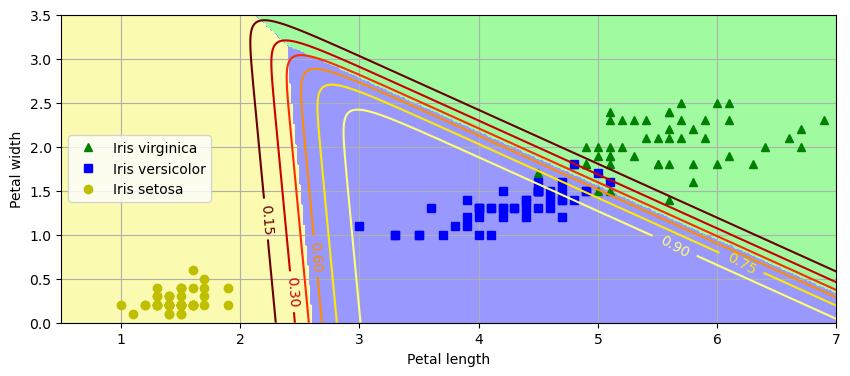

In [ ]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                    np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize = (10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()

```python
from matplotlib.colors import ListedColormap
```
This line imports the `ListedColormap` class from the `matplotlib.colors` module.

```python
custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
```
This line creates a custom colormap object using the `ListedColormap` class. The colormap consists of three colors: light yellow, light blue, and light green.

```python
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                    np.linspace(0, 3.5, 200).reshape(-1, 1))
```
This line creates a grid of points that spans the range of the two input arrays. The `np.meshgrid` function is used to create a coordinate matrix from the two input arrays.

```python
X_new = np.c_[x0.ravel(), x1.ravel()]
```
This line flattens the coordinate matrices `x0` and `x1` into two 1D arrays and then concatenates them column-wise to create a new 2D array `X_new`.

```python
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)
```
These two lines use the `predict_proba` and `predict` methods of the `softmax_reg` object to compute the predicted probabilities and predicted classes for the new data points in `X_new`.

```python
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)
```
These two lines reshape the predicted probabilities and predicted classes into 2D arrays that match the shape of the coordinate matrices `x0` and `x1`.

```python
plt.figure(figsize = (10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")
```
These three lines plot the training data points on a scatter plot. The `X` array contains the training data, and the `y` array contains the corresponding target classes. The `plot` function is used to plot the data points, with different colors and markers used for each class.

```python
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()
```
These lines create a contour plot of the predicted classes and a contour plot of the predicted probabilities. The `contourf` function is used to create the filled contour plot of the predicted classes, with the custom colormap `custom_cmap` used to color the different regions. The `contour` function is used to create the contour plot of the predicted probabilities. The `clabel` function is used to add labels to the contour lines. The `xlabel` and `ylabel` functions are used to label the x-axis and y-axis, respectively. The `legend` function is used to add a legend to the plot. The `axis` function is used to set the limits of the x-axis and y-axis. The `grid` function is used to add a grid to the plot. Finally, the `show` function is used to display the plot.
